# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
from timeit import default_timer as timer
import json
import functools as ft
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_1=pd.read_csv('twitter_archive_enhanced.csv')
# df_1=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [ ]:
folder_path=os.getcwd()
response.content

In [ ]:
with open(os.path.join(folder_path,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [3]:
df_2=pd.read_csv('image-predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
'''
consumer_key = 'I HID IT'
consumer_secret = 'I HID IT'
access_token = 'I HID IT'
access_secret = 'I HID IT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
'''

In [4]:
tweet_ids = df_1.tweet_id.values

In [ ]:
'''
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as json_file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, json_file)
            json_file.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

In [5]:
with open('tweet_json.txt', 'r') as f: #open the txt file in read mode
    data = f.readlines() #read every line as data
    data = [json.loads(d) for d in data]

In [6]:
with open('reformatted_tweet.json', 'w') as f:
    json.dump(data, f)
df = pd.read_json('reformatted_tweet.json')

In [7]:
# I want to know the columns that I will need
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [8]:
df_3 = df[["id","retweet_count","favorite_count"]]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1874,675135153782571009,NaN,NaN,2015-12-11 02:08:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He got locked outside. Damn it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675135153...,5,10,Steven,None,None,None,None
2134,670069087419133954,NaN,NaN,2015-11-27 02:38:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670069087...,5,10,Randall,None,None,None,None
579,800513324630806528,NaN,NaN,2016-11-21 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chef. Chef loves everyone and wants ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
873,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,None,None,None
1013,747219827526344708,NaN,NaN,2016-06-27 00:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,None,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None


In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_1.name.value_counts()[:10]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

In [14]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1520,787810552592695296,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,pug,0.362835,True,French_bulldog,0.221864,True,English_setter,0.080418,True
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
1348,759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,Chesapeake_Bay_retriever,0.194251,True,Labrador_retriever,0.012225,True
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
322,671866342182637568,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1,Labrador_retriever,0.875614,True,Chihuahua,0.032182,True,golden_retriever,0.017232,True
1439,774639387460112384,https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg,1,Walker_hound,0.627593,True,basenji,0.128705,True,Ibizan_hound,0.126282,True
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,0.102595,True


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,7010,33810
1,892177421306343426,5302,29331
2,891815181378084864,3482,22062
3,891689557279858688,7219,36919
4,891327558926688256,7767,35290


In [19]:
df_3.sample(10)

,id,retweet_count,favorite_count
1175,716285507865542656,969,2563
2313,666082916733198337,37,93
458,816014286006976512,4889,0
1208,712438159032893441,1423,4919
143,863079547188785154,953,7894
752,776249906839351296,8474,0
1846,675113801096802304,690,1743
1004,745314880350101504,2486,6617
1169,717009362452090881,873,2989
1312,704859558691414016,477,2077


In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [21]:
df_3.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.487752,7055.195960
std,6.820795e+16,4187.206432,10960.889376
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.000000
50%,7.178418e+17,1149.000000,3053.000000
75%,7.986547e+17,2863.500000,8607.000000
max,8.924206e+17,70792.000000,144874.000000


### Quality issues
1. twitter_archive: Timestamp column is not of the correct datatype]

2. twitter_archive: Some rating denominators have wrong values]

3. twitter_archive: Stop words are being wrongly interpreted as dog names]

4. twitter_archive: Some dogs have 2 dog stages

5. twitter_archive: Some observations are retweets and replies. Only tweets are needed.]

6. image_preds: Some images are not pictures of dogs

7. image_preds: There is a lower/upper case consistency issue concerning the p1,p2 and p3 columns

8. twitter_api: The id column should be in sync(same spelling) with the tweet_id column in other dataframes

### Tidiness issues
1. twitter_archive: The doggo, fluffer, pupper, poppo should be on one column

2. image_preds: The p1,p2 and p3 columns are merged to get the most likely breed of dog

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
twitter_archive=df_1.copy()
imag_pred=df_2.copy()
twitter_api=df_3.copy()

### Issue #1: Need to use only original tweets

#### Define:
The tweet_id that are tweet replies or retweets have to be removed

#### Code

In [23]:
twitter_archive=twitter_archive[twitter_archive.retweeted_status_id.isnull()]
twitter_archive=twitter_archive[twitter_archive.in_reply_to_status_id.isnull()]

#### Test

In [24]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Drop irrelevant columns

#### Define
The columns that relate to retweets and tweet replies are dropped

#### Code

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [25]:
twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                     'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: Four variables to be in one column

#### Define
Melt the puppo, pupper, doggo, floofer columns into one column (dog_stage)

#### Code

In [26]:
for x in ['doggo','floofer','pupper','puppo']:
    twitter_archive[x].replace('None','', inplace = True)

In [27]:
# a new column which is the addition of the 4 columns(puppo, doggo etc)
twitter_archive['dog_stage'] = twitter_archive['doggo']+twitter_archive['floofer']+twitter_archive['pupper']+twitter_archive['puppo']
twitter_archive.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [28]:
# the observations with multiple stages are bundled up. So I make them readable
twitter_archive.dog_stage.replace('doggopupper','doggo, pupper',inplace=True)
twitter_archive.dog_stage.replace('doggopuppo','doggo, puppo',inplace=True)
twitter_archive.dog_stage.replace('doggofloofer','doggo, floofer',inplace=True)
twitter_archive.dog_stage.replace('','None',inplace=True)

#### Test

In [18]:
twitter_archive.dog_stage.value_counts()

None              1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Issue #4: Some pictures in the image_pred are not dogs

#### Define
p1,p2 and p3 all being False means that the picture is not a dog's. They have to be dropped

#### Code

In [29]:
# saving the indexes of rows with False as value for p1,p2 and p3
index_not_dogs=imag_pred.query('p1_dog==False and p2_dog==False and p3_dog==False').index

In [30]:
imag_pred.drop(index_not_dogs,inplace=True)

#### Test

In [21]:
len(imag_pred.query('p1_dog==False and p2_dog==False and p3_dog==False'))

0

### Issue #5: Get the most likely breed in the image_pred dataframe

#### Define
p1, p2 and p3 are merged. The result is going to be the most likely outcome of the trio.

#### Code

In [31]:
# a function that gives the most likely breed of the dog, returns NaN if the neural network's top 3 predictions isn't a dog
def breed(x):
    if x[0]==True:
        return x[1]
    elif x[2]==True:
        return x[3]
    else:
        return x[4]
imag_pred['predicted_breed']=imag_pred[['p1_dog','p1','p2_dog','p2','p3','p3_dog']].apply(breed, axis = 1)

#### Test

In [32]:
imag_pred.predicted_breed.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: predicted_breed, Length: 113, dtype: int64

### Issue #6: Make the breeds column to be consistent in the casing

#### Define
Some of the breed names start with uppercase, some with lower case. We have to make it consistent

In [33]:
imag_pred.predicted_breed=imag_pred.predicted_breed.str.lower()

#### Test

In [34]:
imag_pred.predicted_breed.value_counts()

golden_retriever        173
labrador_retriever      113
pembroke                 96
chihuahua                95
pug                      65
                       ... 
scotch_terrier            1
entlebucher               1
japanese_spaniel          1
standard_schnauzer        1
bouvier_des_flandres      1
Name: predicted_breed, Length: 113, dtype: int64

### Issue #7: Change the name of the id column of twitter_api

#### Define
The column named is being renamed to be in sync with other dataframes

#### Code

In [35]:
twitter_api.rename(columns={'id':'tweet_id'},inplace=True)

#### Test

In [36]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Issue #8: Erroneous datatype for timestamp column. Also to rename the column

#### Define
The column has a wrong dataype of object, instead of datetime. I also want to rename it to tweet_date

#### Code

In [37]:
twitter_archive[['timestamp']]=twitter_archive[['timestamp']].apply(pd.to_datetime)
twitter_archive.rename(columns={'timestamp':'tweet_datetime'},inplace=True)

#### Test

In [38]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   tweet_datetime      2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  dog_stage           2097 non-null 

### Issue #9: Wrong  dognames

#### Define
Some stopwords were used wrongly to represent the names of the dogs

#### Code

In [39]:
# code for getting all the stopwords(they all start with small letters, including None)
empty_set=set()
for x in twitter_archive['name']:
    if x[0].islower():
        empty_set.add(x)
wrong_names=list((empty_set))+['None']
twitter_archive['name'].replace(wrong_names,'No name',inplace=True)

#### Test

In [40]:
twitter_archive['name'].value_counts()[:15]

No name    707
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Daisy        7
Toby         7
Stanley      6
Bailey       6
Bo           6
Name: name, dtype: int64

### Issue #10: Wrong Denominator Values

#### Define
Some of the denominator values are incorrect

#### Code

In [41]:
# Ratings of 10 correspond to a picture of 1 dog, 20 to 2 dogs etc
twitter_archive.rating_denominator.value_counts().sort_index()

2         1
7         1
10     2080
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [42]:
# Denominators having values of 2,7 and 11 are wrong. They are changed
twitter_archive.rating_denominator.replace(2,10,inplace=True)
twitter_archive.rating_denominator.replace(7,10,inplace=True)
twitter_archive.rating_denominator.replace(11,10,inplace=True)

#### Test

In [72]:
twitter_archive.rating_denominator.value_counts().sort_index()

10     2084
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
150       1
170       1
Name: rating_denominator, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
combined_df=[twitter_archive,imag_pred,twitter_api]
combined_df=ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'),combined_df)

In [44]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1658 non-null   int64              
 1   tweet_datetime      1658 non-null   datetime64[ns, UTC]
 2   source              1658 non-null   object             
 3   text                1658 non-null   object             
 4   expanded_urls       1658 non-null   object             
 5   rating_numerator    1658 non-null   int64              
 6   rating_denominator  1658 non-null   int64              
 7   name                1658 non-null   object             
 8   doggo               1658 non-null   object             
 9   floofer             1658 non-null   object             
 10  pupper              1658 non-null   object             
 11  puppo               1658 non-null   object             
 12  dog_stage           1658 non-null 

In [45]:
# Dropping some columns
combined_df.drop(['doggo','floofer','pupper','puppo','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                 'p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [46]:
combined_df.head()

,tweet_id,tweet_datetime,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,predicted_breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,5302,29331
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,3482,22062
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,7219,36919
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,7767,35290
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,No name,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,2599,17798


In [47]:
combined_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

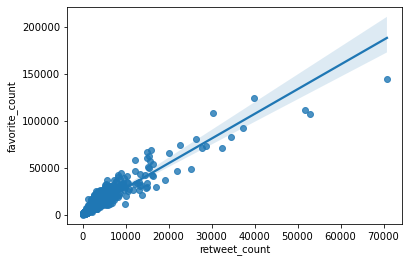

In [48]:
sns.regplot(x=combined_df['retweet_count'],y=combined_df['favorite_count'])

<AxesSubplot:xlabel='retweet_count', ylabel='rating_numerator'>

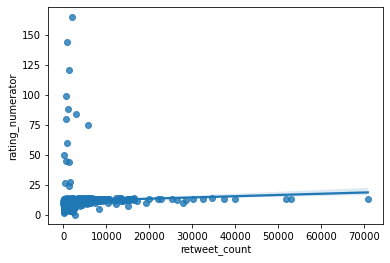

In [49]:
sns.regplot(x=combined_df['retweet_count'],y=combined_df['rating_numerator'])

<AxesSubplot:>

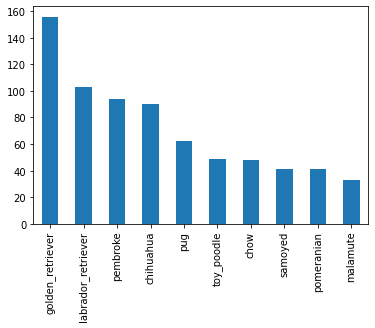

In [50]:
combined_df.predicted_breed.value_counts()[:10].plot(kind='bar')

In [51]:
retweet_probability=combined_df.groupby('predicted_breed').retweet_count.mean().sort_values(ascending=False)[:10]
retweet_probability

predicted_breed
bedlington_terrier    6689.333333
afghan_hound          4789.000000
standard_poodle       4486.818182
french_bulldog        4409.200000
english_springer      4401.500000
saluki                4137.250000
whippet               4111.909091
cocker_spaniel        3960.900000
eskimo_dog            3881.500000
samoyed               3809.268293
Name: retweet_count, dtype: float64

In [52]:
fav_probability=combined_df.groupby('predicted_breed').favorite_count.mean().sort_values(ascending=False)[:10]
fav_probability

predicted_breed
bedlington_terrier         21557.000000
saluki                     20803.000000
french_bulldog             17537.866667
bouvier_des_flandres       15354.000000
afghan_hound               14713.000000
black-and-tan_coonhound    14668.000000
flat-coated_retriever      14522.375000
irish_water_spaniel        13981.000000
whippet                    12712.090909
leonberg                   12654.333333
Name: favorite_count, dtype: float64

### Insights:
1. The favorite and retweet count are positively correlated.

2. The dog breed with most likely to be liked or retweeted is bedlington_terrier.

3. There is little to no correlation between rating numerator and retweet count.

### Visualization

Text(0, 0.5, 'Average likes')

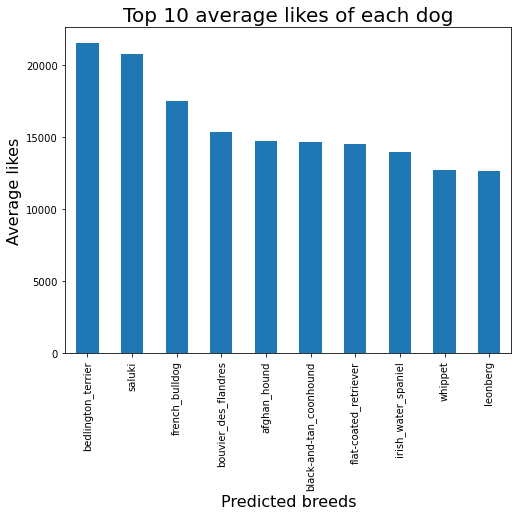

In [71]:
fav_probability=combined_df.groupby('predicted_breed').favorite_count.mean().sort_values(ascending=False)[:10]
plt.subplots(figsize=(8, 6))
fav_probability.plot.bar()
plt.title('Top 10 average likes of each dog',fontsize=20)
plt.xlabel('Predicted breeds',fontsize=16)
plt.ylabel('Average likes',fontsize=16)